<a href="https://colab.research.google.com/github/Girik-N/Voting-Dapp/blob/main/disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
import os
import glob
import cv2
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocess_path(image):
  img = cv2.imread(image)
  img = cv2.resize(img, (64,64))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # img = np.array(img, dtype="float32")
  img = img/255.0
  return img

files.upload()

{}

# Brain Tumor

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection
!unzip \*.zip  && rm *.zip

In [ ]:
print("The number of MRI Images labelled 'yes':",len(os.listdir('yes')))
print("The number of MRI Images labelled 'no':",len(os.listdir('no')))

The number of MRI Images labelled 'yes': 155
The number of MRI Images labelled 'no': 98


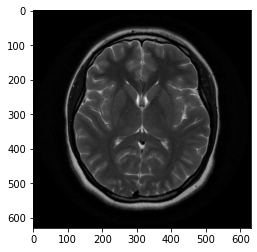

In [ ]:
plt.imshow(cv2.imread("/content/no/1 no.jpeg"))

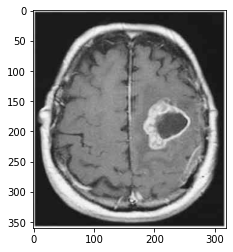

In [ ]:
plt.imshow(cv2.imread("/content/yes/Y10.jpg"))

Found 253 images belonging to 2 classes.


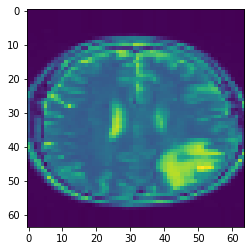

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        'brain_tumor_dataset',
        target_size=(64,64),
        batch_size=32,
        color_mode='grayscale',
        shuffle=True,
        class_mode='binary')


plt.imshow(np.squeeze(next(train_generator)[0][0]))

In [ ]:
brain_model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 1)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])
brain_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
brain_history=brain_model.fit(train_generator,epochs=20,verbose=1)

Epoch 1/20
8/8 [==============================] - 3s 224ms/step - loss: 0.6389 - acc: 0.6324
Epoch 2/20
8/8 [==============================] - 2s 205ms/step - loss: 0.5800 - acc: 0.6838
Epoch 3/20
8/8 [==============================] - 2s 215ms/step - loss: 0.5513 - acc: 0.7431
Epoch 4/20
8/8 [==============================] - 2s 214ms/step - loss: 0.5491 - acc: 0.7312
Epoch 5/20
8/8 [==============================] - 2s 214ms/step - loss: 0.5401 - acc: 0.7154
Epoch 6/20
8/8 [==============================] - 2s 216ms/step - loss: 0.5353 - acc: 0.7352
Epoch 7/20
8/8 [==============================] - 2s 219ms/step - loss: 0.5303 - acc: 0.7391
Epoch 8/20
8/8 [==============================] - 2s 210ms/step - loss: 0.5193 - acc: 0.7589
Epoch 9/20
8/8 [==============================] - 2s 208ms/step - loss: 0.4938 - acc: 0.7945
Epoch 10/20
8/8 [==============================] - 2s 209ms/step - loss: 0.4737 - acc: 0.7787
Epoch 11/20
8/8 [==============================] - 2s 224ms/step - lo

In [ ]:
brain_prediction = []
for i in range(4):
  n = glob.glob("/content/no/*.jpg")[i]
  y = glob.glob("/content/yes/*.jpg")[i]
  brain_prediction.append([preprocess_path(y), 1])
  brain_prediction.append([preprocess_path(n), 0])

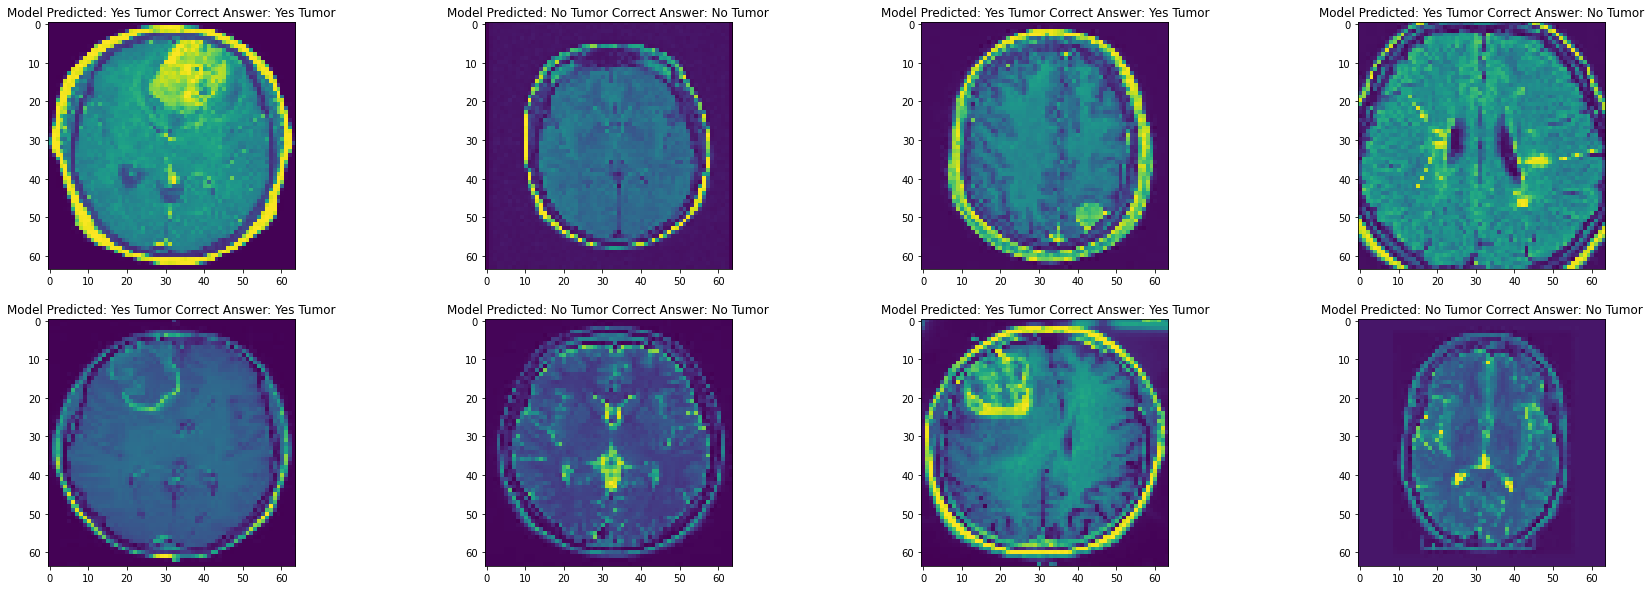

In [ ]:
fig, axs = plt.subplots(2,4, figsize=(30, 10))
y_or_n = ["No Tumor", "Yes Tumor"]
axs = axs.ravel()

for i in range(8):
    graph = brain_prediction[i][0]
    truth = brain_prediction[i][1]
    axs[i].imshow(np.squeeze(graph))
    prediction = y_or_n[0 if brain_model.predict(graph.reshape(1,64,64,1))<0.5 else 1]
    axs[i].set_title(f"Model Predicted: {prediction} Correct Answer: {y_or_n[truth]}")

# Pneumonia Detection

https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip \*.zip  && rm *.zip

Found 5216 images belonging to 2 classes.


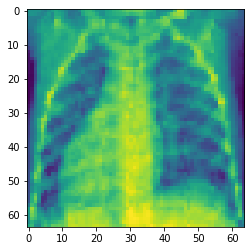

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        'chest_xray/train',
        target_size=(64,64),
        batch_size=32,
        color_mode='grayscale',
        shuffle=True,
        class_mode='binary')

plt.imshow(np.squeeze(next(train_generator)[0][0]))

In [ ]:
lung_model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 1)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])
lung_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
lung_history=lung_model.fit(train_generator,epochs=20,verbose=1)

Epoch 1/20
163/163 [==============================] - 73s 441ms/step - loss: 0.3727 - acc: 0.8324
Epoch 2/20
163/163 [==============================] - 70s 428ms/step - loss: 0.2277 - acc: 0.9055
Epoch 3/20
163/163 [==============================] - 71s 432ms/step - loss: 0.1898 - acc: 0.9256
Epoch 4/20
163/163 [==============================] - 70s 428ms/step - loss: 0.1607 - acc: 0.9398
Epoch 5/20
163/163 [==============================] - 70s 431ms/step - loss: 0.1497 - acc: 0.9436
Epoch 6/20
163/163 [==============================] - 73s 447ms/step - loss: 0.1467 - acc: 0.9434
Epoch 7/20
163/163 [==============================] - 70s 432ms/step - loss: 0.1390 - acc: 0.9457
Epoch 8/20
163/163 [==============================] - 70s 429ms/step - loss: 0.1296 - acc: 0.9484
Epoch 9/20
163/163 [==============================] - 70s 432ms/step - loss: 0.1406 - acc: 0.9463
Epoch 10/20
163/163 [==============================] - 70s 428ms/step - loss: 0.1204 - acc: 0.9534
Epoch 11/20
163/163

In [1]:
lung_prediction = []
for i in range(4):
  n = glob.glob("/content/chest_xray/chest_xray/train/NORMAL/*.jpeg")[i]
  y = glob.glob("/content/chest_xray/chest_xray/train/PNEUMONIA/*.jpeg")[i]
  lung_prediction.append([preprocess_path(y), 1])
  lung_prediction.append([preprocess_path(n), 0])

NameError: ignored

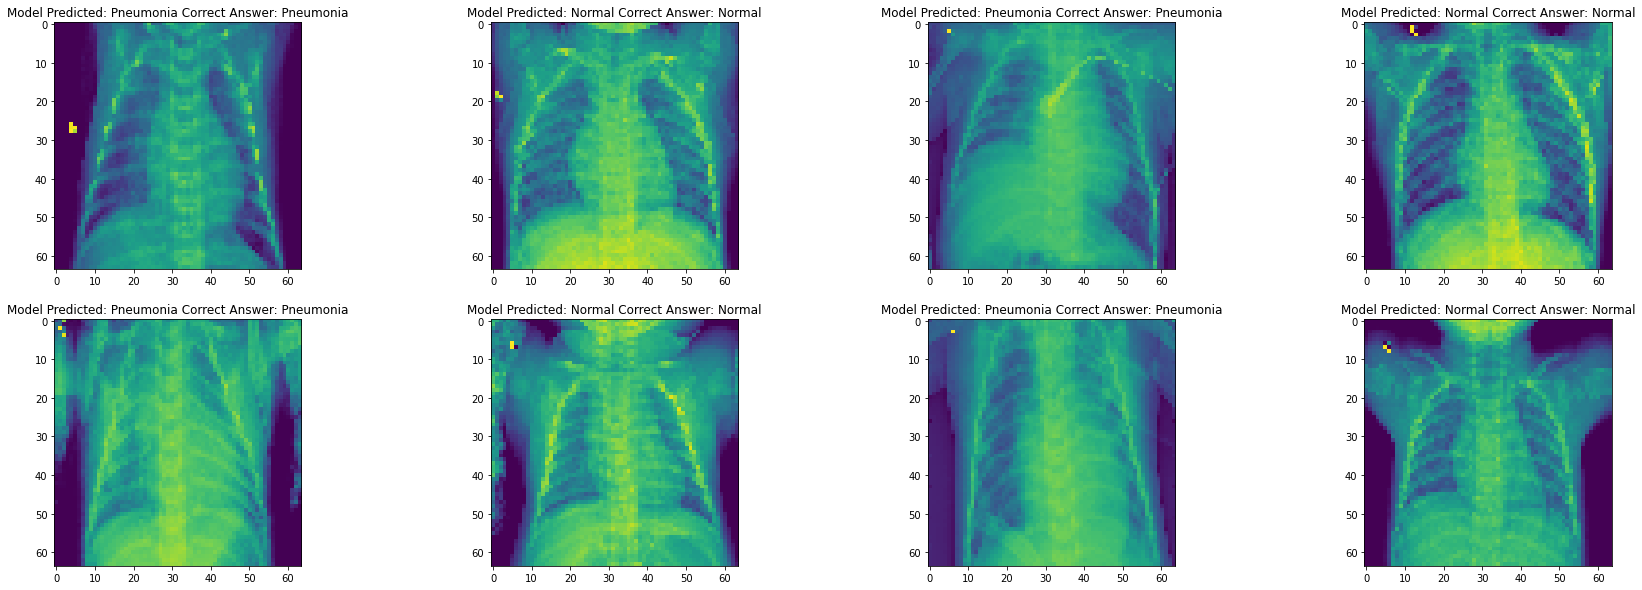

In [ ]:
fig, axs = plt.subplots(2,4, figsize=(30, 10))
lung_classes = ["Normal", "Pneumonia"]
axs = axs.ravel()

for i in range(8):
    graph = lung_prediction[i][0]
    truth = lung_prediction[i][1]
    axs[i].imshow(np.squeeze(graph))
    prediction = lung_classes[0 if lung_model.predict(graph.reshape(1,64,64,1))<0.5 else 1]
    axs[i].set_title(f"Model Predicted: {prediction} Correct Answer: {lung_classes[truth]}")

# Breast Cancer Detection

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d uciml/breast-cancer-wisconsin-data
!unzip \*.zip  && rm *.zip

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 32.5MB/s]
Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
# Importing data
data = pd.read_csv('data.csv')
del data['Unnamed: 32']

In [ ]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(30,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(16, activation='relu', input_shape=(30,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
6/6 [==============================] - 2s 5ms/step - loss: 0.6026 - accuracy: 0.6953
Epoch 2/150
6/6 [==============================] - 0s 7ms/step - loss: 0.5535 - accuracy: 0.7539
Epoch 3/150
6/6 [==============================] - 0s 7ms/step - loss: 0.5097 - accuracy: 0.8086
Epoch 4/150
6/6 [==============================] - 0s 10ms/step - loss: 0.4651 - accuracy: 0.8555
Epoch 5/150
6/6 [==============================] - 0s 8ms/step - loss: 0.4276 - accuracy: 0.8867
Epoch 6/150
6/6 [==============================] - 0s 9ms/step - loss: 0.3952 - accuracy: 0.8965
Epoch 7/150
6/6 [==============================] - 0s 6ms/step - loss: 0.3690 - accuracy: 0.8945
Epoch 8/150
6/6 [==============================] - 0s 9ms/step - loss: 0.3310 - accuracy: 0.9160
Epoch 9/150
6/6 [==============================] - 0s 7ms/step - loss: 0.3121 - accuracy: 0.9160
Epoch 10/150
6/6 [==============================] - 0s 6ms/step - loss: 0.2967 - accuracy: 0.9141
Epoch 11/150
6/6 [==========

Our accuracy is 98.24561403508771%


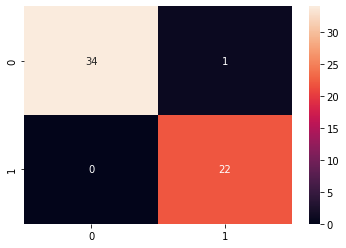

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)

print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

sns.heatmap(cm,annot=True)
plt.savefig('confusion_matrix_breast.png')